In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# To display all lines
pd.set_option('display.max_rows', None)
# To display all columns
pd.set_option('display.max_columns', None)

##### Analyse données retailer

In [ ]:
df_ret = pd.read_csv("/data/retailer.csv")

In [17]:
df_ret.head()

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN
3,reTjziox2cSrxVq70Y,2024-02-28 04:30:42,Product Page View,Science Diet,SD Fel Adt HBC OFEnt 24x5.5oz cs,NaN,NaN
4,reOrpt9vhSwhbPVtni,2024-06-01 22:22:30,Product Page View,NaN,NaN,NaN,NaN


In [18]:
df_ret.shape

(9866049, 7)

In [19]:
print(df_ret.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866049 entries, 0 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    object 
 1   timestamp_utc  object 
 2   event_name     object 
 3   brand          object 
 4   product_name   object 
 5   sales          float64
 6   quantity       float64
dtypes: float64(2), object(5)
memory usage: 526.9+ MB
None


In [13]:
df_ret.isna().sum()

customer_id            0
timestamp_utc          0
event_name             0
brand             277240
product_name      277240
sales            8426738
quantity         8426738
dtype: int64

In [21]:
nan_ret = df_ret.isnull().sum() * 100 / len(df_ret)
print(nan_ret)

customer_id       0.000000
timestamp_utc     0.000000
event_name        0.000000
brand             2.810041
product_name      2.810041
sales            85.411475
quantity         85.411475
dtype: float64


In [23]:
print(df_ret['event_name'].value_counts())

event_name
Product Page View    6376627
Add to cart          2050111
Order                1439311
Name: count, dtype: int64


In [25]:
print(df_ret['brand'].value_counts())

brand
Science Diet         7858536
Prescription Diet    1247520
Hills                 482753
Name: count, dtype: int64


In [61]:
print(df_ret['product_name'].value_counts())

product_name
SD Ca Adt SmPws Ckn 4.5lb bg                 221043
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg         187571
SD Ca Adt SenSt&Sk Ckn 30lb bg               185433
SD Ca A7+ SB Ckn 5lb bg                      160037
SD Pup SmPws Ckn 4.5lb bg                    159705
SD Pup SB Ckn 4.5lb bg                       138958
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs     135724
SD Ca Adt SmPws Ckn 15.5lb bg                118589
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg        117054
SD Ca Adt PerWgt Sm&Min Ckn 4lb bg           113685
SD Pup Ckn 15.5lb bg                          98551
SD Fel Adt Ckn 4lb bg                         98432
SD Ca Adt SenSt&Sk Ckn 4lb bg                 98282
SD Ca Adt SenSt&Sk Ckn 15.5lb bg              98038
SD Ca Adt Ckn 35lb Sh                         94879
SD Ca Adt SenSt&Sk SB Ckn 4lb bg              92439
SD Pup SB Ckn 12.5lb bg                       87965
SD Ca Adt SmPws LM&BR 4.5lb bg                87396
SD Ca Adt LB Ckn 35lb Sh                      87001

In [30]:
print(df_ret['product_name'].nunique())

505


##### Filtrage sur les commandes

In [34]:
df_ventes = df_ret[df_ret['event_name'] == 'Order'].copy()

In [35]:
df_ventes.shape

(1439311, 7)

##### Chiffre d'affaire par marque

In [41]:
CA_marque = df_ventes.groupby('brand')['sales'].sum().sort_values(ascending=False).head(10)

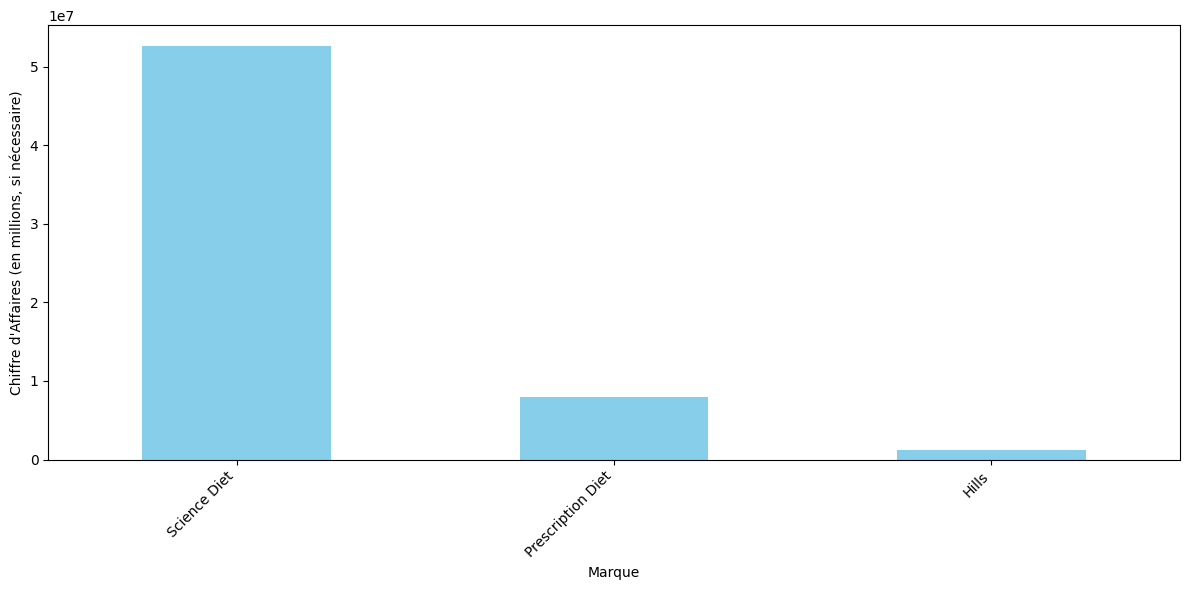

In [ ]:
plt.figure(figsize=(12, 6))
CA_marque.plot(kind='bar', color='skyblue')
plt.xlabel('Marque')
plt.ylabel('Chiffre d\'Affaires (en millions, si nécessaire)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
marque_leader = df_ventes.groupby('brand')['sales'].sum().idxmax() 
df_leader = df_ventes[df_ventes['brand'] == marque_leader]

# 3. Calculer le CA par produit pour cette marque
top10_products_leader = df_leader.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 des produits de la marque leader :")
print(top10_products_leader)


Top 10 des produits de la marque leader :
product_name
SD Ca Adt SenSt&Sk Ckn 30lb bg              2126231.17
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs    1481516.64
SD Ca Adt LB Ckn 35lb Sh                    1059499.15
SD Ca Adt Ckn 35lb Sh                       1035124.30
SD Ca Adt SmPws Ckn 15.5lb bg                935143.43
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg        916534.14
SD Ca Adt PerWgt Vg&CknStew 12x12.5oz cs     865775.78
SD Ca Adt SenSt&Sk Ckn 15.5lb bg             859343.33
SD Ca Adt PerWgt Ckn 25lb bg                 824296.22
SD Ca Adt SenSt&Sk Ckn 12x12.8oz cs          817279.88
Name: sales, dtype: float64


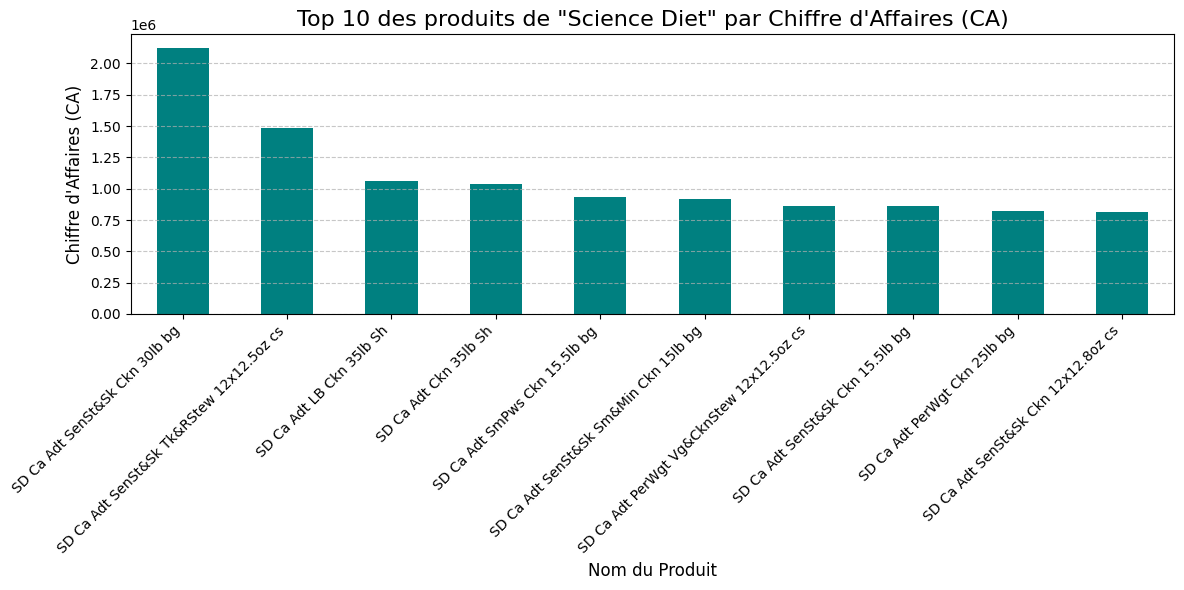

In [53]:
plt.figure(figsize=(12, 6))
top10_products_leader.plot(kind='bar', color='teal')

plt.title(f'Top 10 des produits de "{marque_leader}" par Chiffre d\'Affaires (CA)', fontsize=16)
plt.xlabel('Nom du Produit', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (CA)', fontsize=12)

plt.xticks(rotation=45, ha='right') # Rotation pour la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_25478/3028973287.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_per_month = df_ventes.set_index('timestamp_utc')['sales'].resample('M').sum()


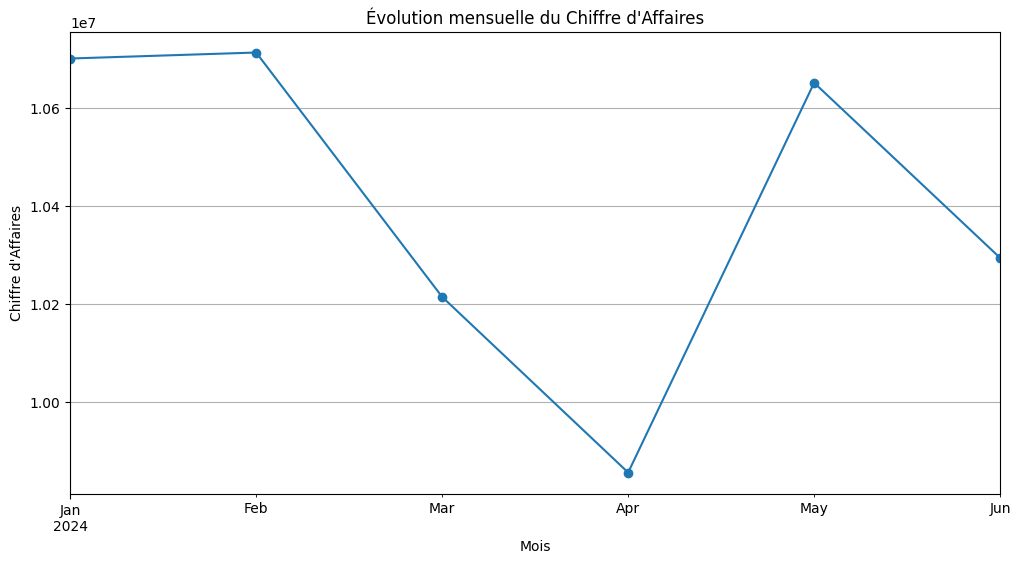

In [ ]:
df_ventes['timestamp_utc'] = pd.to_datetime(df_ventes['timestamp_utc'])

# Regrouper les ventes par mois
sales_per_month = df_ventes.set_index('timestamp_utc')['sales'].resample('M').sum()

# Visualisation
plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='line', marker='o')
plt.title('Évolution mensuelle du Chiffre d\'Affaires')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'Affaires')
plt.grid(True)
plt.show()

In [ ]:
total_views = df_ret[df_ret['event_name'] == 'Product Page View'].shape[0]
total_orders = df_ret[df_ret['event_name'] == 'Order'].shape[0]

if total_views > 0:
    conversion_rate = (total_orders / total_views) * 100
    print(f"\nTotal des pages produits vues : {total_views:,}")
    print(f"Total des transactions (ordres) : {total_orders:,}")
    print(f"Taux de Conversion Page Vue -> Vente : {conversion_rate:.2f}%")
else:
    print("Attention : Aucune page produit vue enregistrée pour le calcul du taux de conversion.")


Total des pages produits vues : 6,376,627
Total des transactions (ordres) : 1,439,311
Taux de Conversion Page Vue -> Vente : 22.57%


In [ ]:
df_ret['timestamp_utc'] = pd.to_datetime(df_ret['timestamp_utc'])

# 1. Préparer la colonne de groupement Année-Mois
df_ret['year_month'] = df_ret['timestamp_utc'].dt.to_period('M')

# 2. Compter les événements par mois
# Crée une colonne 'is_view' (1 pour Vue, 0 sinon) et 'is_order' (1 pour Commande, 0 sinon)
df_ret['is_view'] = (df_ret['event_name'] == 'Product Page View').astype(int)
df_ret['is_order'] = (df_ret['event_name'] == 'Order').astype(int)

# 3. Calculer les totaux mensuels
monthly_data = df_ret.groupby('year_month').agg(
    total_views=('is_view', 'sum'),
    total_orders=('is_order', 'sum')
).reset_index()

# 4. Calculer le taux de conversion (pourcentage)
monthly_data['conversion_rate'] = (monthly_data['total_orders'] / monthly_data['total_views']) * 100

# Supprimer les mois où il n'y a pas eu de pages vues pour éviter les divisions par zéro/NaN
monthly_data = monthly_data[monthly_data['total_views'] > 0].copy()

# 5. Visualisation
plt.figure(figsize=(12, 6))
# Convertir l'index PeriodDtype en chaîne de caractères pour l'affichage
x_labels = monthly_data['year_month'].astype(str)
plt.plot(x_labels, monthly_data['conversion_rate'], marker='o', linestyle='-', color='purple')
plt.title('Taux de Conversion Mensuel (Page Vue -> Vente)')
plt.xlabel('Mois')
plt.ylabel('Taux de Conversion (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('conversion_rate_mensuel.png')
plt.close()

print("Le graphique du taux de conversion mensuel a été enregistré sous 'conversion_rate_mensuel.png'.")
print("Les taux de conversion mensuels calculés sont :")
print(monthly_data[['year_month', 'conversion_rate']].head())

Le graphique du taux de conversion mensuel a été enregistré sous 'conversion_rate_mensuel.png'.
Les taux de conversion mensuels calculés sont :
  year_month  conversion_rate
0    2024-01        19.915249
1    2024-02        20.805874
2    2024-03        24.091520
3    2024-04        22.669851
4    2024-05        23.933341


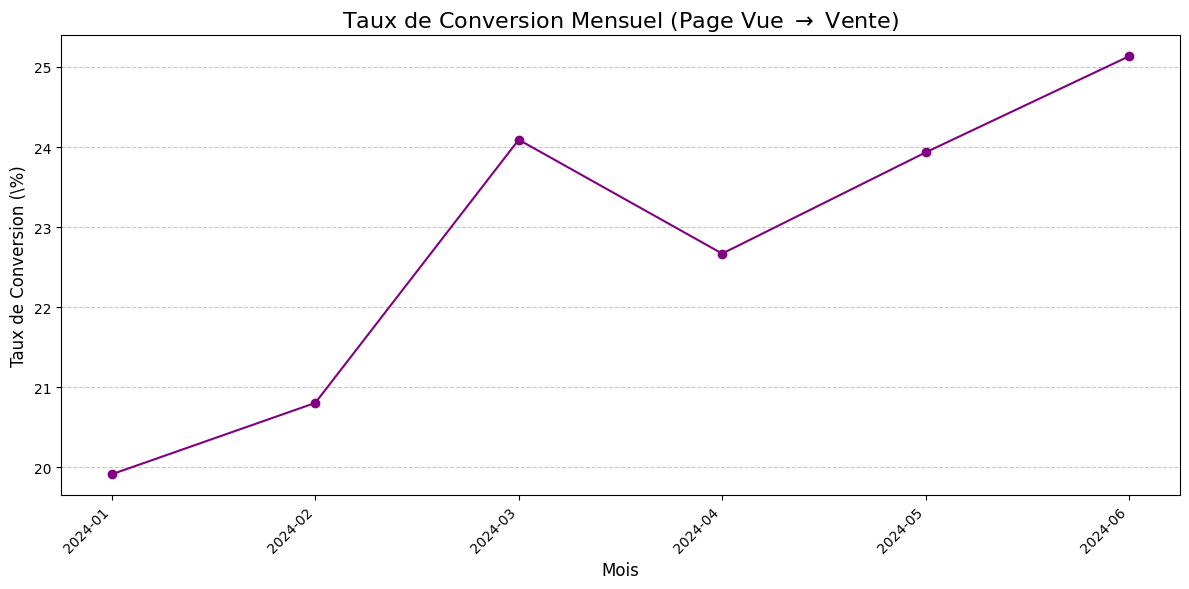

In [ ]:
# 1. Préparer la colonne de groupement Année-Mois
df_ret['year_month'] = df_ret['timestamp_utc'].dt.to_period('M')

# 2. Identifier les événements
# Crée une colonne 'is_view' (1 pour Vue) et 'is_order' (1 pour Commande)
df_ret['is_view'] = (df_ret['event_name'] == 'Product Page View').astype(int)
df_ret['is_order'] = (df_ret['event_name'] == 'Order').astype(int)

# 3. Calculer les totaux mensuels (Vues et Commandes)
monthly_data = df_ret.groupby('year_month').agg(
    total_views=('is_view', 'sum'),
    total_orders=('is_order', 'sum')
).reset_index()

# 4. Calculer le taux de conversion (pourcentage)
monthly_data['conversion_rate'] = (monthly_data['total_orders'] / monthly_data['total_views']) * 100

# Filtrer les mois où il n'y a pas eu de pages vues pour éviter les divisions par zéro/NaN
monthly_data = monthly_data[monthly_data['total_views'] > 0].copy()

# --- SECTION 3 : VISUALISATION ---

plt.figure(figsize=(12, 6))

# Convertir l'index PeriodDtype en chaîne de caractères pour l'affichage
x_labels = monthly_data['year_month'].astype(str)

plt.plot(x_labels, monthly_data['conversion_rate'], marker='o', linestyle='-', color='purple')

plt.title('Taux de Conversion Mensuel (Page Vue $\\to$ Vente)', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Taux de Conversion (\\%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()

##### Données socio démographiques

In [ ]:
df_socio = pd.read_csv("/data/socio_demo.csv")

In [55]:
df_socio.head()

,customer_id,breed,age,income
0,rezLh5Hae3m6flaxM4,Purebred,[25-35[,[120-200K$[
1,resWkHpEcL1IUfdoBp,Purebred,[25-35[,[80-120K$[
2,re9qxF7kS9R2LwOVVY,Purebred,[35-45[,[80-120K$[
3,re3IZNYZY6xr8OAE56,Purebred,[55-65[,[40-80K$[
4,re01lnV2DfgMLdfIF7,Purebred,[65+[,[80-120K$[


In [56]:
df_socio.shape

(1354584, 4)

In [58]:
df = pd.merge(left=df_ret, right=df_socio, on='customer_id', how='left')

In [62]:
nan_df = df.isnull().sum() * 100 / len(df)
print(nan_df)

customer_id       0.000000
timestamp_utc     0.000000
event_name        0.000000
brand             2.810041
product_name      2.810041
sales            85.411475
quantity         85.411475
year_month        0.000000
is_view           0.000000
is_order          0.000000
breed             0.000000
age               0.000000
income            0.000000
dtype: float64


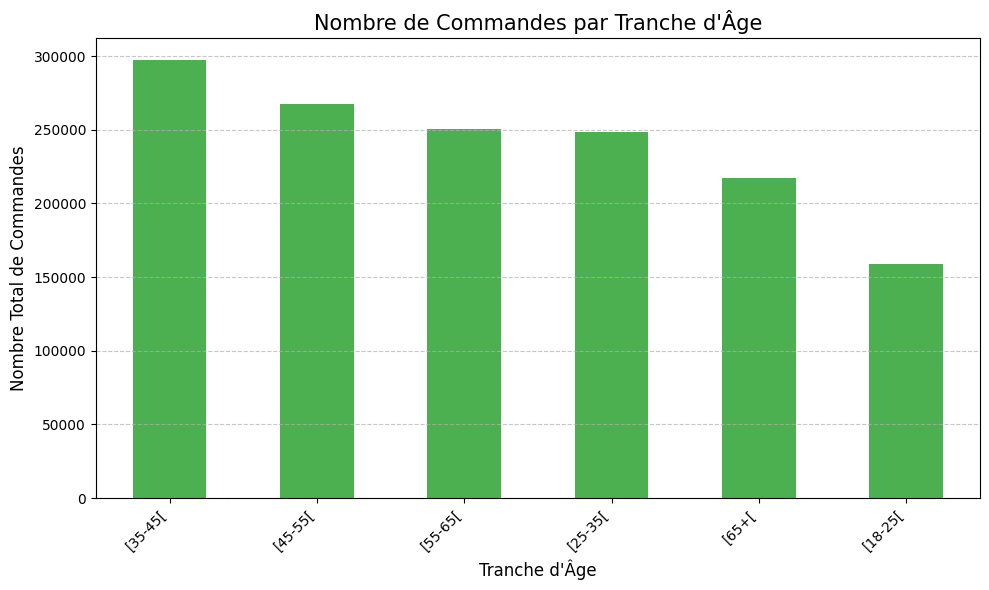

In [63]:
# 1. Isoler les transactions de vente (event_name == 'Order')
df_orders = df[df['event_name'] == 'Order'].copy()

# 2. Calculer le nombre de commandes par catégorie d'âge
orders_by_age = df_orders.groupby('age').size().sort_values(ascending=False)

# 3. Visualisation
plt.figure(figsize=(10, 6))
orders_by_age.plot(kind='bar', color='#4CAF50')

plt.title('Nombre de Commandes par Tranche d\'Âge', fontsize=15)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

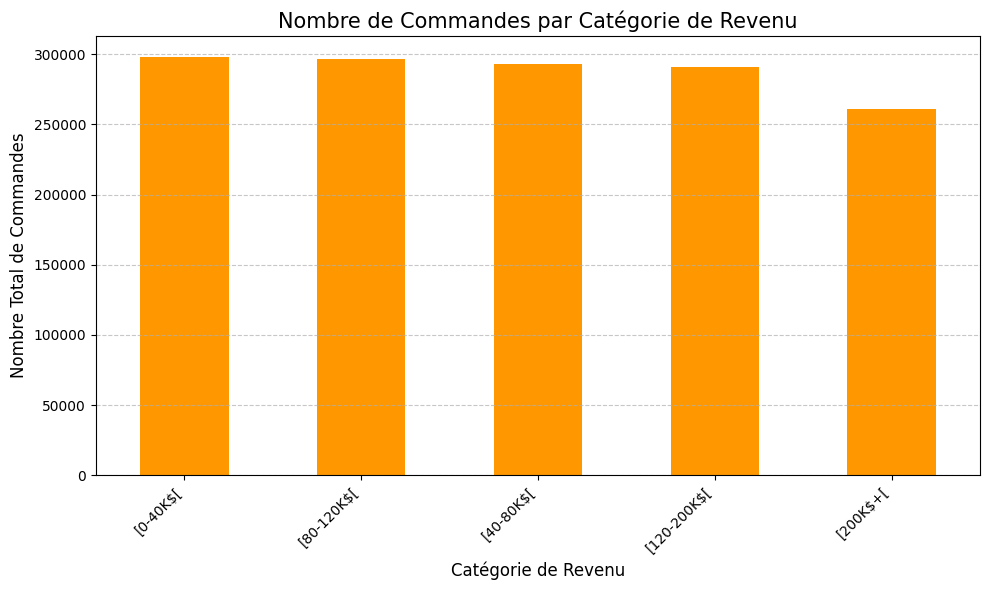

In [64]:
# 2. Calculer le nombre de commandes par catégorie de revenu
orders_by_income = df_orders.groupby('income').size().sort_values(ascending=False)

# 3. Visualisation
plt.figure(figsize=(10, 6))
orders_by_income.plot(kind='bar', color='#FF9800')

plt.title('Nombre de Commandes par Catégorie de Revenu', fontsize=15)
plt.xlabel('Catégorie de Revenu', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

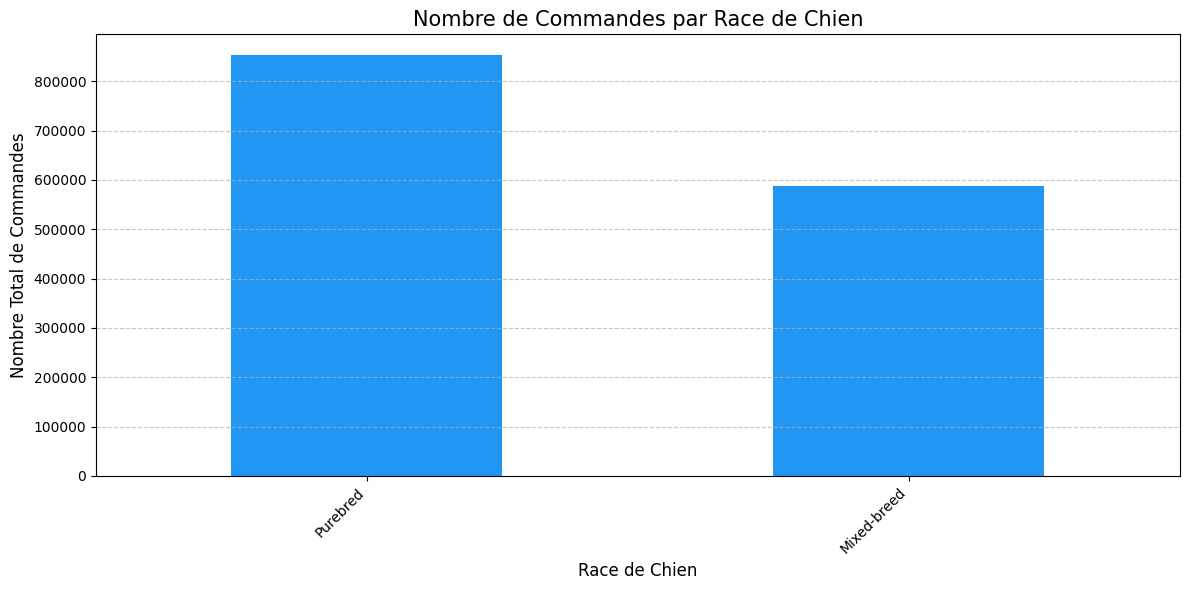

In [66]:
# 2. Calculer le nombre de commandes par race de chien
orders_by_breed = df_orders.groupby('breed').size().sort_values(ascending=False).head(10) # Top 10 pour la lisibilité

# 3. Visualisation
plt.figure(figsize=(12, 6))
orders_by_breed.plot(kind='bar', color='#2196F3')

plt.title('Nombre de Commandes par Race de Chien', fontsize=15)
plt.xlabel('Race de Chien', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Purebred=chien de race pure
#Mixed-breed=chien de race mixte

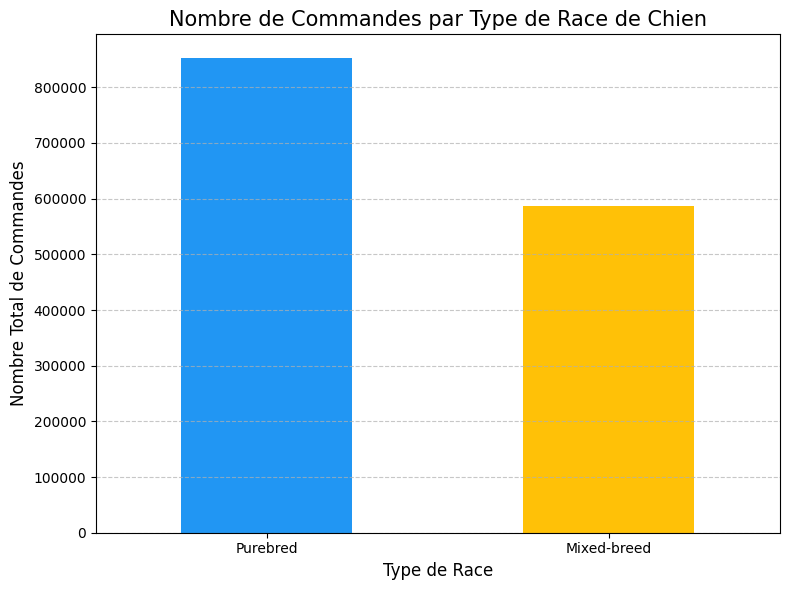

In [67]:
# 1. Isoler les transactions de vente (event_name == 'Order')
df_orders = df[df['event_name'] == 'Order'].copy()

# 2. Calculer le nombre de commandes par catégorie de race (Purebred vs Mixed-breed)
orders_by_simplified_breed = df_orders.groupby('breed').size().sort_values(ascending=False)

# 3. Visualisation
plt.figure(figsize=(8, 6))
orders_by_simplified_breed.plot(kind='bar', color=['#2196F3', '#FFC107'])

plt.title('Nombre de Commandes par Type de Race de Chien', fontsize=15)
plt.xlabel('Type de Race', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=0) # Pas besoin de rotation
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

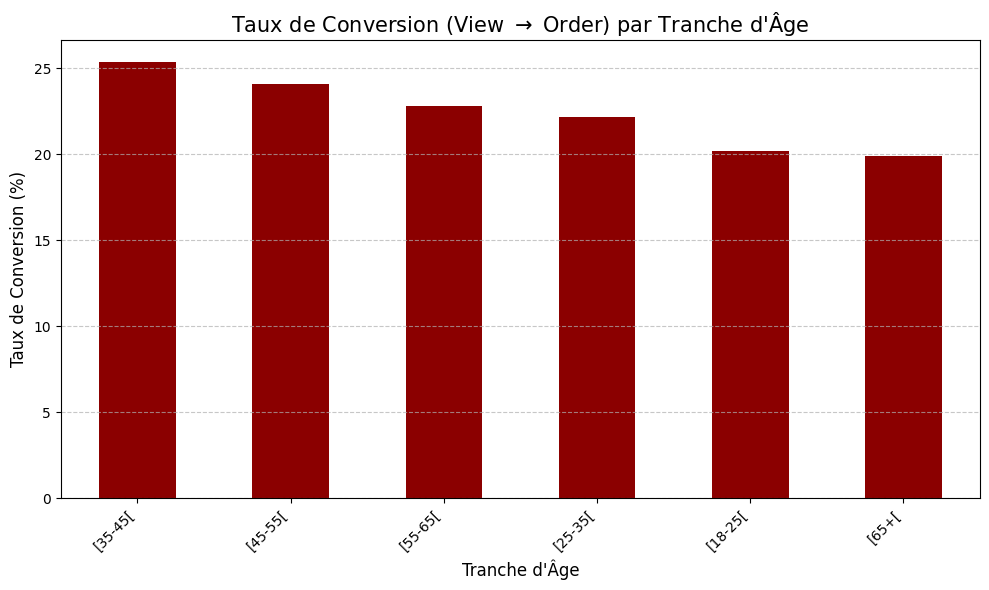


Taux de Conversion par Tranche d'Âge:
 age
[35-45[    25.363128
[45-55[    24.113443
[55-65[    22.834317
[25-35[    22.150336
[18-25[    20.190582
[65+[      19.894379
Name: conversion_rate, dtype: float64


In [68]:
# S'assurer que 'df' est bien votre DataFrame fusionné

def calculate_conversion_rate(df, segment_column):
    """Calcule le taux de conversion (Order / View) pour chaque segment."""
    
    # Filtrer uniquement les événements pertinents
    df_events = df[df['event_name'].isin(['Product Page View', 'Order'])].copy()
    
    # Créer les indicateurs binaires
    df_events['is_view'] = (df_events['event_name'] == 'Product Page View').astype(int)
    df_events['is_order'] = (df_events['event_name'] == 'Order').astype(int)
    
    # Grouper par segment pour obtenir les totaux de Vues et d'Ordres
    segment_data = df_events.groupby(segment_column).agg(
        total_views=('is_view', 'sum'),
        total_orders=('is_order', 'sum')
    )
    
    # Calculer le taux de conversion (%)
    segment_data['conversion_rate'] = (segment_data['total_orders'] / segment_data['total_views']) * 100
    
    # Nettoyage (éviter les divisions par zéro)
    segment_data = segment_data[segment_data['total_views'] > 0].sort_values(
        'conversion_rate', ascending=False
    )
    return segment_data['conversion_rate']

# --- Application pour les trois variables ---

# 1. Taux de Conversion par Âge
cvr_by_age = calculate_conversion_rate(df, 'age')

# 2. Taux de Conversion par Revenu
cvr_by_income = calculate_conversion_rate(df, 'income')

# 3. Taux de Conversion par Type de Race
cvr_by_breed = calculate_conversion_rate(df, 'breed')


# --- Visualisation (exemple pour l'âge) ---
plt.figure(figsize=(10, 6))
cvr_by_age.plot(kind='bar', color='darkred')
plt.title('Taux de Conversion (View $\\to$ Order) par Tranche d\'Âge', fontsize=15)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Taux de Conversion (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nTaux de Conversion par Tranche d'Âge:\n", cvr_by_age)
# Vous pouvez répéter le bloc de visualisation pour 'cvr_by_income' et 'cvr_by_breed'

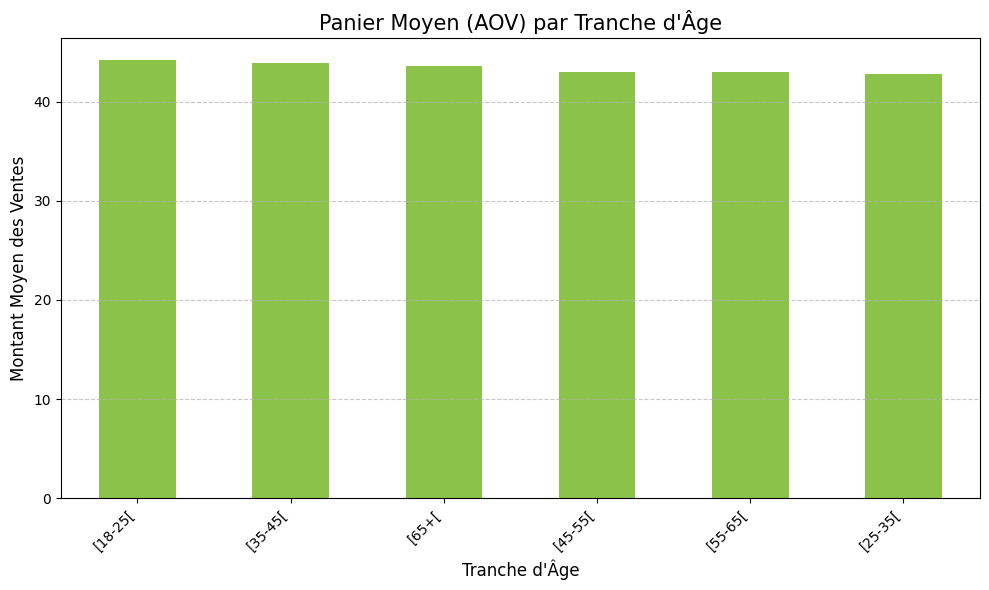


Panier Moyen par Tranche d'Âge:
 age
[18-25[    44.178481
[35-45[    43.871270
[65+[      43.645016
[45-55[    43.034239
[55-65[    42.986497
[25-35[    42.780693
Name: sales, dtype: float64


In [70]:
# Utiliser le DataFrame de ventes filtré (df_sales)

# Calculer le Panier Moyen par catégorie d'âge
aov_by_age = df_orders.groupby('age')['sales'].mean().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
aov_by_age.plot(kind='bar', color='#8BC34A')
plt.title('Panier Moyen (AOV) par Tranche d\'Âge', fontsize=15)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Montant Moyen des Ventes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nPanier Moyen par Tranche d'Âge:\n", aov_by_age)
# Répéter l'analyse pour 'income' et 'breed'.